---
### Universidad de Costa Rica
#### IE0405 - Modelos Probabilísticos de Señales y Sistemas
---

- Estudiante: **Fernanda Villalobos Vargas**
- Carné: **B78363**
- Grupo: **2**
- Estudiante: **David Enrique Madrigal Solís**
- Carné: **B43969**
- Grupo: **1**



---

# `P5` - *Procesos M/M/s*

## 1. Sistemas M/M/1

Es menester tomar una decisión con respecto al número de "servidores" necesarios para cierto proceso de vacunación, de forma tal que el sistema no exceda 50 personas en fila durante el 95% del tiempo de servicio. 

En un estudio de afluencia y del tiempo de servicio se asumen y determinan los siguientes parámetros:

- La tasa de llegada $\lambda$ es constante durante ocho horas de funcionamiento y tiene un valor de $\lambda = 4$ personas por minuto.

- La tasa de servicio $\nu$ de cada "servidor" (es decir, personal de salud tomando datos y vacunando) es constante durante ocho horas de funcionamiento y tiene un valor de $\nu = 0.25$ personas por minuto.


---
> ### (40%) Hacer la determinación teórica del número $s$ de servidores necesarios para cumplir el requisito.

La ecuación para definir $\rho$ es la siguiente:

$$
\rho = \frac{\lambda}{\nu \cdot s}
$$

Al sustituir los valores por los dados en el enunciado se tiene que:

$$
\rho = \frac{4}{0.25 \cdot s} = \frac{16}{s}
$$

Se cosidera la condición de menor ruptura, como semuestra a continuación:

$$
P( \text{51 o más clientes en el sistema} ) = \sum_{i=51}^{\infty} (1 - \rho) \rho^i  = 1 - \sum_{i=0}^{50} (1 - \rho) \rho^i = \rho^{51}
$$

Tomando en cuenta el 5% que proporciona la condición de ruptura se dice

$$
\left( \frac{16}{s} \right)^{51} \leq 0.05
$$

Al despejar la $s$ tenemos

$$
\left( \frac{16^{51}}{0.05} \right) \leq s^{51}
$$

$$
\Rightarrow 16.97  \leq s
$$

El número de servidores debe tener al menos 17 para se cumpla la condición de 50 personas en la cola en 95% del tiempo.

---
> ### (60%) Modificar el código provisto para simular y corroborar el resultado anterior y crear al menos dos gráficas que muestren esta simulación.

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

def simulaciones(Sim, N, lam, v, s):

    nu = (v*s)/60

    # Distribución de los tiempos de llegada entre cada cliente
    X = stats.expon(scale = 1/lam)

    # Distribución de los tiempos de servicio a cada cliente
    Y = stats.expon(scale = 1/nu)

    # Intervalos entre llegadas (segundos desde último cliente)
    t_intervalos = np.ceil(X.rvs(N)).astype('int')

    # Tiempos de las llegadas (segundos desde el inicio)
    t_llegadas = [t_intervalos[0]]
    for i in range(1, len(t_intervalos)):
        siguiente = t_llegadas[i-1] + t_intervalos[i]
        t_llegadas.append(siguiente)

    # Tiempos de servicio (segundos desde inicio de servicio)
    t_servicio = np.ceil(Y.rvs(N)).astype('int')

    # Inicialización del tiempo de inicio y fin de atención
    inicio = t_llegadas[0]          # primera llegada
    fin = inicio + t_servicio[0]    # primera salida

    # Tiempos en que recibe atención cada i-ésimo cliente (!= que llega)
    t_atencion = [inicio]
    for i in range(1, N):
        inicio = np.max((t_llegadas[i], fin))
        fin = inicio + t_servicio[i]
        t_atencion.append(inicio)

    # Inicialización del vector temporal para registrar eventos
    t = np.zeros(t_atencion[-1] + t_servicio[-1] + 1)

    # Asignación de eventos de llegada (+1) y salida (-1) de clientes
    for c in range(N):
        i = t_llegadas[c]
        t[i] += 1
        j = t_atencion[c] + t_servicio[c]
        t[j] -= 1

    # Umbral de P o más personas en sistema (hay P - 1 en fila)
    P = 51

    # Instantes (segundos) de tiempo con P o más solicitudes en sistema
    exceso = 0

    # Proceso aleatorio (estados n = {0, 1, 2...})
    Xt = np.zeros(t.shape)

    # Inicialización de estado n
    n = 0

    # Recorrido del vector temporal y conteo de clientes (estado n)
    for i, c in enumerate(t):
        n += c # sumar (+1) o restar (-1) al estado
        Xt[i] = n
        if Xt[i] >= P: 
            exceso += 1

    # Fracción de tiempo con P o más solicitudes en sistema
    fraccion = exceso / len(t)
    '''
    # Resultados
    print('Parámetro lambda =', str(lam*60))
    print('Parámetro nu*s =', str(nu*60))
    print('Tiempo con más de {} solicitudes en fila:'.format(P-1))
    print('\t {:0.2f}%'.format(100*fraccion)) 
    '''
    # Para mostrar los resultados de las simulaciones
    print('1.Simulación {}'.format(Sim))
    print('2.Parámetro de lambda =', str(lam*60))
    print('3.Parámetro de v =', str(v))
    print('4.Servidores de s =', str(s))
    print('5.Tiempo menor o igual a {} solicitudes en la fila:'.format(P))
    print('\t {:0.2f}%'.format(100*fraccion))


    if fraccion <= 0.05:
        print('\t Sí cumple con la especificación.')
    else:
        print('\t No cumple con la especificación.') 
    print('Simulación es equivalente a {:0.2f} horas.'.format(len(t)/3600))

    # Gráfica de X(t) (estados del sistema)
    plt.figure()
    plt.plot(Xt)
    plt.plot(range(len(t)), (P-1)*np.ones(t.shape))
    plt.title('Simulación {}: Comprobación de solicitudes con {} Servidores'.format(Sim, s))
    plt.legend(('$X(t) = n$', '$L_q = $' + str(P)))
    plt.ylabel('Clientes en el sistema, $n$')
    plt.xlabel('Tiempo, $t$ / segundos')
    plt.xlim((0, 15000))
    plt.show()

Para el éxito se debe de confirmar que $17 \leq s$, por lo tanto se harán tres simulaciones para poder corroborarlo.

#### Para la primer simulación se dice que s = 14.


1.Simulación 1
2.Parámetro de lambda = 4.0
3.Parámetro de v = 0.25
4.Servidores de s = 14
5.Tiempo menor o igual a 51 solicitudes en la fila:
	 59.46%
	 No cumple con la especificación.
Simulación es equivalente a 4.84 horas.


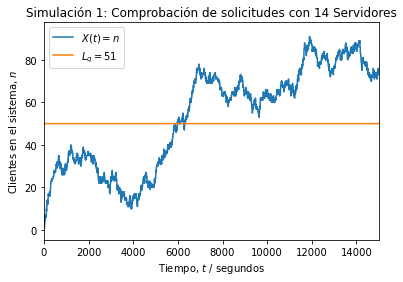

In [2]:
# Número de clientes
N = 1000

# Parámetro de llegada (clientes/segundos)
L = 4/60

# Parámetro de servicio (servicios/segundos)
v = 0.25

# Para a primer simulación
Sim = 1

# Número de servidores obtenidos teóricamente para cumplir requerimientos
s = 14

# Para simula y comprobar el resultado teórico
simulaciones(Sim, N, L, v, s)

#### Para la segunda simulación se dice que s = 17.

1.Simulación 2
2.Parámetro de lambda = 4.0
3.Parámetro de v = 0.25
4.Servidores de s = 17
5.Tiempo menor o igual a 51 solicitudes en la fila:
	 0.81%
	 Sí cumple con la especificación.
Simulación es equivalente a 4.40 horas.


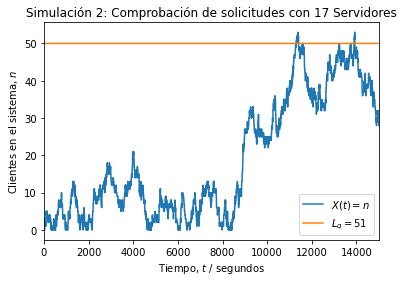

In [3]:
# Número de clientes
N = 1000

# Parámetro de llegada (clientes/segundos)
L = 4/60

# Parámetro de servicio (servicios/segundos)
v = 0.25

# Para a primer simulación
Sim = 2

# Número de servidores obtenidos teóricamente para cumplir requerimientos
s = 17

# Para simula y comprobar el resultado teórico
simulaciones(Sim, N, L, v, s)

#### Para la tercer simulación se dice que s = 47.

1.Simulación 3
2.Parámetro de lambda = 4.0
3.Parámetro de v = 0.25
4.Servidores de s = 47
5.Tiempo menor o igual a 51 solicitudes en la fila:
	 0.00%
	 Sí cumple con la especificación.
Simulación es equivalente a 4.36 horas.


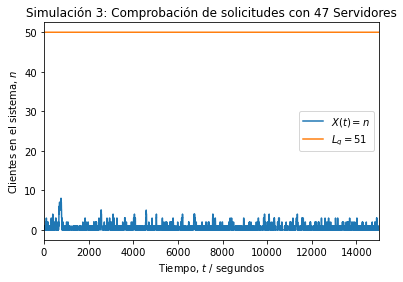

In [4]:
# Número de clientes
N = 1000

# Parámetro de llegada (clientes/segundos)
L = 4/60

# Parámetro de servicio (servicios/segundos)
v = 0.25

# Para a tercera simulación
Sim = 3

# Número de servidores obtenidos teóricamente para cumplir requerimientos
s = 47

# Para simula y comprobar el resultado teórico
simulaciones(Sim, N, L, v, s)

---

**Universidad de Costa Rica**

Facultad de Ingeniería

Escuela de Ingeniería Eléctrica

---